In [1]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
{'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI', 'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
{'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN', 'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
{'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4', 'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
{'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr', 'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
{'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY', 'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
{'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B', 'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
{'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh', 'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
{'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7', 'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
{'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF', 'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
{'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g', 'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
{'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q', 'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
{'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS', 'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
{'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9', 'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [4]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [144]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['NEOUSDT', 'QTUMUSDT', 'RLCUSDT']


In [5]:
_LIMIT_ = 1000
_SYMBOL_ = 'KAVAUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [6]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close,close_max,close_min = [],[],[]
_MINETS_ = 60
_INTERVAL_ = "30m"
for i in range(1, 37):
    print(round(i/37*100,2),'%',TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*i)), TimestampToNormal(TimestampNow - MinetsTimestamp(_MINETS_*(i-1))))

    _klines_ = bot.futuresKlines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
    )
    _klines_ = klines_parsing(_klines_)
    for i in _klines_:
        close_max.append(i['High'])
        close_min.append(i['Low'])
print(close_max, close_min)

2.7 % 2023-03-10 16:04:21 2023-03-10 17:04:21
5.41 % 2023-03-10 15:04:21 2023-03-10 16:04:21
8.11 % 2023-03-10 14:04:21 2023-03-10 15:04:21
10.81 % 2023-03-10 13:04:21 2023-03-10 14:04:21
13.51 % 2023-03-10 12:04:21 2023-03-10 13:04:21
16.22 % 2023-03-10 11:04:21 2023-03-10 12:04:21
18.92 % 2023-03-10 10:04:21 2023-03-10 11:04:21
21.62 % 2023-03-10 09:04:21 2023-03-10 10:04:21
24.32 % 2023-03-10 08:04:21 2023-03-10 09:04:21
27.03 % 2023-03-10 07:04:21 2023-03-10 08:04:21
29.73 % 2023-03-10 06:04:21 2023-03-10 07:04:21
32.43 % 2023-03-10 05:04:21 2023-03-10 06:04:21
35.14 % 2023-03-10 04:04:21 2023-03-10 05:04:21
37.84 % 2023-03-10 03:04:21 2023-03-10 04:04:21
40.54 % 2023-03-10 02:04:21 2023-03-10 03:04:21
43.24 % 2023-03-10 01:04:21 2023-03-10 02:04:21
45.95 % 2023-03-10 00:04:21 2023-03-10 01:04:21
48.65 % 2023-03-09 23:04:21 2023-03-10 00:04:21
51.35 % 2023-03-09 22:04:21 2023-03-09 23:04:21
54.05 % 2023-03-09 21:04:21 2023-03-09 22:04:21
56.76 % 2023-03-09 20:04:21 2023-03-09 21:04

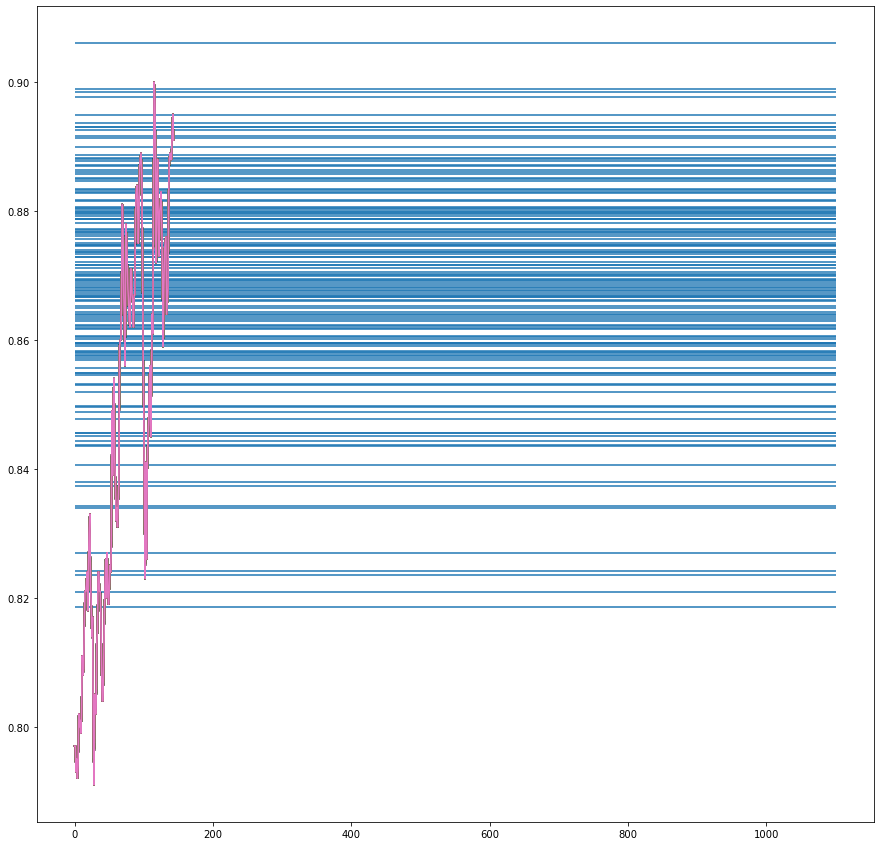

In [7]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [8]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
print(close_max_min)

[0.8977, 0.8949, 0.893, 0.8914, 0.8878, 0.8985, 0.8931, 0.887, 0.8653, 0.875, 0.88, 0.8737, 0.886, 0.8788, 0.87, 0.8662, 0.8792, 0.8795, 0.886, 0.8804, 0.8832, 0.8798, 0.8916, 0.886, 0.8864, 0.8887, 0.906, 0.8926, 0.8767, 0.8899, 0.8649, 0.8734, 0.8569, 0.853, 0.8519, 0.858, 0.8549, 0.8455, 0.8456, 0.8435, 0.8596, 0.8444, 0.8594, 0.8489, 0.8803, 0.8721, 0.8852, 0.885, 0.8828, 0.8834, 0.8829, 0.8797, 0.888, 0.8872, 0.899, 0.8937, 0.8673, 0.8689, 0.8685, 0.8678, 0.8747, 0.8695, 0.8638, 0.8685, 0.8692, 0.8682, 0.8817, 0.8748, 0.8729, 0.8787, 0.8666, 0.8635, 0.8857, 0.8883, 0.8788, 0.8768, 0.8756, 0.8846, 0.864, 0.8717, 0.8545, 0.8581, 0.863, 0.8602, 0.8549, 0.8618, 0.8498, 0.8496, 0.8681, 0.8667, 0.8761, 0.8676, 0.8693, 0.8668, 0.8815, 0.8739, 0.866, 0.8701, 0.8857, 0.8807, 0.8575, 0.8701, 0.8477, 0.8577, 0.8406, 0.8342, 0.838, 0.8451, 0.8339, 0.8374, 0.8242, 0.8236, 0.8186, 0.8209, 0.8437, 0.827, 0.8706, 0.8572, 0.8782, 0.877, 0.8746, 0.8712, 0.8716, 0.8728, 0.8772, 0.8736, 0.8643, 0.876

In [9]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный', 'Заработали с сделки'])
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный,Заработали с сделки


In [10]:
def glass_parser(glass, number):
    for en1, i in enumerate(glass):
        if str(number) in i:
            break
    return en1, i

def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where]==value:
            return(index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

def open_value_monitor(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, types, parts_left, new_glass):
    global earn_for_cycle
    global is_cycle_break
    new_glass_count = float(glass_parser(new_glass, start_futures)[1][1])
    if start_futures == fuchers_last_price and new_glass_count<old_glass_count:
        if types == 1:
            earn_for_cycle = profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)
            is_cycle_break = True
        elif types == 2:
            earn_for_cycle = profit_calculate_for_cycle(start_futures, end, lots_part*parts_left, taker, maker)
            is_cycle_break = True

def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit

def profit_calculate_for_cycle(reduced, deductible, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)+start_sum
    return start_sum

def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap):#Пробой asks и отcкок bids
    global earn_for_cycle    
    global is_cycle_break   
    true_answeres_after = []
    is_cycle_break = False    
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker+taker
    part_of_take_profit = lots/parts
    parts_left = parts
    gap_take = (take_profit-commission_costs)/parts
    lots_part = lots/parts 
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    start_spot = spot_last_price
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start_futures)
    print('Время  открытия сделки', TimeNow())
    ans_after = [commission_costs<x<fuchers_last_price*(1+take_profit) for x in asks]
    for i in range(len(ans_after)):
        if ans_after[i]:
            true_answeres_after.append(ans_after[i])
    if len(true_answeres_after)>0: 
        nearest_value_after = min(true_answeres_after, key=lambda x:abs(x-float(fuchers_last_price)))
        while True:    
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
            spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])           
            if fuchers_last_price >= nearest_value_after - tick_size*gap:
                end = fuchers_last_price
                end_time = TimeNow()                
                earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part*parts_left, taker, maker)
                if earn_for_cycle >= 0:
                    right_answer += 1
                    print('Закрылись в плюс', f'sell {type_operation}', end)
                else:
                    false_answer+=1
                    print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
                break                    
            
            elif fuchers_last_price<start_futures*(1-stop_loss):
                end = fuchers_last_price
                end_time = TimeNow()                
                earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part*parts_left, taker, maker)                
                false_answer+=1
                print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
                break      
    else:
        while True:
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
            spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])

            if fuchers_last_price<start_futures*(1-stop_loss):
                end = fuchers_last_price
                end_time = TimeNow()
                earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part*parts_left, taker, maker)
                if earn_for_cycle >= 0:
                    right_answer += 1
                    print('Закрылись в плюс', f'sell {type_operation}', end)
                else:
                    false_answer+=1
                    print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
                break

            if fuchers_last_price>start_futures*(1+(commission_costs+gap_take*number_take)):
                end = fuchers_last_price
                parts_left -= 1
                number_take += 1
                earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)

            if parts_left == 0:
                end = fuchers_last_price
                end_time = TimeNow()
                if earn_for_cycle >= 0:
                    right_answer += 1
                    print('Закрылись в плюс', f'sell {type_operation}', end)
                else:
                    false_answer+=1
                    print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, True, earn_for_cycle]
                break
            if for_timer == 0:
                end = fuchers_last_price
                timer = Timer(3.0, open_value_monitor, args=(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, 1, parts_left, new_glass,), kwargs=None)
                timer.start()
                for_timer += 1

            if is_cycle_break:
                print('За цикл заработали/потеряли', earn_for_cycle)
                profit += earn_for_cycle
                start_sum += earn_for_cycle
                return profit, start_sum, right_answer, false_answer
                break        
    print('За цикл заработали/потеряли', earn_for_cycle)
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer

def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap): #Пробой bids и отcкок asks
    global earn_for_cycle    
    global is_cycle_break   
    true_answeres_after = []
    is_cycle_break = False    
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker+taker
    part_of_take_profit = lots/parts
    parts_left = parts
    gap_take = (take_profit-commission_costs)/parts
    lots_part = lots/parts 
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    start_spot = spot_last_price
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start_futures)
    print('Время  открытия сделки', TimeNow())
    ans_after = [commission_costs<x<fuchers_last_price*(1-take_profit) for x in bids]
    for i in range(len(ans_after)):
        if ans_after[i]:
            true_answeres_after.append(ans_after[i])
    if len(true_answeres_after)>0: 
        nearest_value_after = min(true_answeres_after, key=lambda x:abs(x-float(fuchers_last_price)))
        while True:
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
            spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])           
            if fuchers_last_price <= nearest_value_after + tick_size*gap:
                end = fuchers_last_price
                end_time = TimeNow()                
                earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)
                if earn_for_cycle >= 0:
                    right_answer += 1
                    print('Закрылись в плюс', f'sell {type_operation}', end)
                else:
                    false_answer+=1
                    print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
                break                    
            
            elif fuchers_last_price>start_futures*(1+stop_loss):
                end = fuchers_last_price
                end_time = TimeNow()                
                earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)                
                false_answer+=1
                print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
                break                 
    else:    
        while True:
            fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
            spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
            if fuchers_last_price < start_futures*(1-(commission_costs+gap_take*number_take)):
                end=fuchers_last_price
                parts_left -= 1
                number_take += 1
                earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)

            if fuchers_last_price>start_futures*(1+stop_loss):
                end = fuchers_last_price
                end_time = TimeNow()
                earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part*parts_left, taker, maker)
                if earn_for_cycle >= 0:
                    right_answer += 1
                    print('Закрылись в плюс', f'sell {type_operation}', end)
                else:
                    false_answer+=1
                    print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, False, earn_for_cycle]
                break

            if parts_left == 0:
                end = fuchers_last_price
                end_time = TimeNow()
                if earn_for_cycle >= 0:
                    right_answer += 1
                    print('Закрылись в плюс', f'sell {type_operation}', end)
                else:
                    false_answer+=1
                    print('Закрылись в минус', f'sell {type_operation}', end)
                print('Время  закрытия сделки', TimeNow())
                df.loc[len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end, end_time, True, earn_for_cycle]
                break 

            if for_timer == 0:
                end = fuchers_last_price
                timer = Timer(3.0, open_value_monitor, args=(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, 2, parts_left, new_glass,), kwargs=None)
                timer.start()
                for_timer += 1

            if is_cycle_break:
                print('За цикл заработали/потеряли', earn_for_cycle)
                profit += earn_for_cycle
                start_sum += earn_for_cycle
                return profit, start_sum, right_answer, false_answer                
                break
    print('За цикл заработали/потеряли', earn_for_cycle)
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer


In [13]:
i = 0
profit = 0
start_sum = 20
#lots=10
how_more_mean_vol_for_rebound = 5
how_more_mean_vol_for_breakdown = 8
number_in_info = find_list(_SYMBOL_, coin_list)[0]
gap = 2
parts = 5
stop_loss = 0.001
take_profit = 0.003
right_answer = 0
false_answer = 0
bot_number = 0
maker = 0.000162
taker = 0.000324
close_max_copy = close_max.copy()
close_min_copy = close_min.copy()
BOT_LIST = client_create(_API_LIST_)
before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close'] 

while True:
    try:
        if TimeNow()[17:19] == '20':
            before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']        
        
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number += 1
        bids = []
        asks = []
        new_close_max = []
        new_close_min = []
        true_answeres_before = []
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        tick_size = float(BOT_LIST[bot_number].futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
        bids_asks_list_vol = []
        close_max_min_list_vol = []
        new_glass = glass['bids'] + glass['asks']
        
        for j in glass['bids']:
            bids_asks_list_vol.append(j[1])
            close_max_min_list_vol.append(j[1])
        for z in glass['asks']:
            bids_asks_list_vol.append(z[1])
            close_max_min_list_vol.append(z[1])
        
        close_max_min_list_vol = np.array(close_max_min_list_vol).astype(np.float)
        mean_for_breakdown = np.mean(close_max_min_list_vol)*how_more_mean_vol_for_breakdown
        
        bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)
        mean_for_rebound = np.mean(bids_asks_list_vol)*how_more_mean_vol_for_rebound
        
        for u in glass['bids']:
            if float(u[1])>=mean_for_rebound and float(u[1])<mean_for_breakdown:
                bids.append(u[0])
            elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_max_copy:
                new_close_max.append(float(u[0]))
        for f in glass['asks']:
            if float(f[1])>=mean_for_rebound and float(f[1])<mean_for_breakdown:
                asks.append(f[0])
            elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_min_copy:
                new_close_min.append(float(u[0]))            

        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
        try:
            nearest_close_max = min(new_close_max, key=lambda x:abs(x-float(fuchers_last_price)))
        except ValueError:
            nearest_close_max = 999999  
        try:
            nearest_close_min = min(new_close_min, key=lambda x:abs(x-float(fuchers_last_price)))
        except ValueError:
            nearest_close_min = 999999        
        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price

        if fuchers_last_price == nearest_close_max:
            old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
            time.sleep(0.5)
            if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap)

        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_close_min:
            old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
            time.sleep(0.5)
            if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap)

        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_bids + tick_size*gap and before_price>nearest_bids + tick_size*gap:
            ans_before = [fuchers_last_price<x<fuchers_last_price*(1+(maker+taker)) for x in asks]
            for i in range(len(ans_before)):
                if ans_before[i]:
                    true_answeres_before.append(ans_before[i]) 
            if len(true_answeres_before)==0:                      
                old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
                profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap) 
                list(bids).clear()

        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_asks - tick_size*gap and before_price<nearest_asks - tick_size*gap:
            ans_before = [fuchers_last_price*(1-(maker+taker))<x<fuchers_last_price for x in bids]
            for i in range(len(ans_before)):
                if ans_before[i]:
                    true_answeres_before.append(ans_before[i]) 
            if len(true_answeres_before)==0:            
                old_glass_count= float(glass_parser(new_glass, fuchers_last_price)[1][1]) #float(find_list(str(fuchers_last_price), glass['bids'])[1][1])
                profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass, gap)
                list(asks).clear()

        if i % 15 == 0:
            list(bids).clear()
            list(asks).clear()
            list(new_close_max).clear()
            list(new_close_min).clear()
        print('Время', TimeNow())
        print('Текущая цена', fuchers_last_price)
        print('Торгуемый объем для отскока', mean_for_rebound)
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        print('#########################################')
    except Exception as err:
        print('Ошибка:', err)

Время 2023-03-10 20:06:44
Текущая цена 0.8904
Торгуемый объем для отскока 26958.640499999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 22.461814914645103
#########################################
Время 2023-03-10 20:06:53
Текущая цена 0.8902
Торгуемый объем для отскока 27116.845999999998
Заработали: 0
Правильных ответов: 0 Неправильных ответов: 0
Конечеая сумма: 20 Кол-во торгуемых лотов: 22.46686137946529
#########################################


KeyboardInterrupt: 

In [166]:
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный,Заработали с сделки
0,NEOUSDT,отскок,bids,10.662,2023-03-08 22:55:27,10.635,2023-03-08 23:01:40,True,0.021799
1,NEOUSDT,отскок,bids,10.631,2023-03-08 23:04:23,10.603,2023-03-08 23:08:16,True,0.021915
2,NEOUSDT,отскок,asks,10.629,2023-03-08 23:12:31,10.617,2023-03-08 23:13:48,False,-0.025199
3,NEOUSDT,отскок,bids,10.610,2023-03-08 23:17:08,10.626,2023-03-08 23:17:48,False,-0.039922
4,NEOUSDT,отскок,asks,10.627,2023-03-08 23:18:05,10.654,2023-03-08 23:23:16,True,0.022616
...,...,...,...,...,...,...,...,...,...
76,NEOUSDT,отскок,asks,10.483,2023-03-09 06:33:36,10.510,2023-03-09 06:39:10,True,0.022296
77,NEOUSDT,отскок,asks,10.514,2023-03-09 06:39:26,10.503,2023-03-09 06:42:21,False,-0.023006
78,NEOUSDT,отскок,bids,10.498,2023-03-09 06:52:38,10.509,2023-03-09 06:56:23,False,-0.029631
79,NEOUSDT,отскок,asks,10.511,2023-03-09 06:56:35,10.538,2023-03-09 06:58:20,True,0.021810


In [174]:
df.loc[(df['bids or asks']=='asks') & (df['Правильный Неправильный']==False)].count()

Монета                     38
Тип операции               38
bids or asks               38
Цена входа                 38
Время входа                38
Цена выхода                38
Время выхода               38
Правильный Неправильный    38
Заработали с сделки        38
dtype: int64

In [175]:
data_3 = pd.DataFrame([], columns=['Время', 'Правильных', 'Неправильных', 'Отношение True к False'])
data_3

,Время,Правильных,Неправильных,Отношение True к False


In [201]:
for i in range(0, 24):
    true=0
    false=0
    if i<10:
        a=df[df['Время входа'].astype(str).str.contains(f' 0{i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()
    else:
        a=df[df['Время входа'].astype(str).str.contains(f' {i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()        
    data_3.loc[ len(data_3.index )] = [i, true, false, true/false]

data_3

,Время,Правильных,Неправильных,Отношение True к False
0,0.0,2.0,3.0,0.666667
1,1.0,1.0,6.0,0.166667
2,2.0,3.0,10.0,0.300000
3,3.0,4.0,10.0,0.400000
4,4.0,5.0,9.0,0.555556
5,5.0,4.0,7.0,0.571429
6,6.0,2.0,5.0,0.400000
7,7.0,0.0,0.0,NaN
8,8.0,0.0,0.0,NaN
9,9.0,0.0,0.0,NaN


In [165]:
df.to_csv (r'scalping_bot_version8_5.csv', index= False)

In [ ]:
i = 0
profit = 0
start_sum = 20
#lots=10
how_more_mean_vol_for_rebound = 2.5
how_more_mean_vol_for_breakdown = 3.5
number_in_info = find_list(_SYMBOL_, coin_list)[0]
gap = 3
parts = 5
stop_loss = 0.001
take_profit = 0.003
right_answer = 0
false_answer = 0
bot_number = 0
maker = 0.000162
taker = 0.000324
close_max_copy = close_max.copy()
close_min_copy = close_min.copy()
BOT_LIST = client_create(_API_LIST_)
before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close'] 

while True:
    try:
        if TimeNow()[17:19] == '20':
            before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']        
        
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number += 1
        bids = []
        asks = []
        new_close_max = []
        new_close_min = []
        true_answeres_before = []
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        tick_size = float(BOT_LIST[bot_number].futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
        bids_asks_list_vol = []
        close_max_min_list_vol = []
        new_glass = glass['bids'] + glass['asks']
        
        for j in glass['bids']:
            bids_asks_list_vol.append(j[1])
            close_max_min_list_vol.append(j[1])
        for z in glass['asks']:
            bids_asks_list_vol.append(z[1])
            close_max_min_list_vol.append(z[1])
        
        close_max_min_list_vol = np.array(close_max_min_list_vol).astype(np.float)
        mean_for_breakdown = np.mean(close_max_min_list_vol)*how_more_mean_vol_for_breakdown
        
        bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)
        mean_for_rebound = np.mean(bids_asks_list_vol)*how_more_mean_vol_for_rebound
        
        for u in glass['bids']:
            if float(u[1])>=mean_for_rebound and float(u[1])<mean_for_breakdown:
                bids.append(u[0])
            elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_max_copy:
                new_close_max.append(float(u[0]))
        for f in glass['asks']:
            if float(f[1])>=mean_for_rebound and float(f[1])<mean_for_breakdown:
                asks.append(f[0])
            elif float(u[1])>=mean_for_breakdown and float(u[0]) in close_min_copy:
                new_close_min.append(float(u[0]))            

        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
        try:
            nearest_close_max = min(new_close_max, key=lambda x:abs(x-float(fuchers_last_price)))
        except ValueError:
            nearest_close_max = 999999  
        try:
            nearest_close_min = min(new_close_min, key=lambda x:abs(x-float(fuchers_last_price)))
        except ValueError:
            nearest_close_min = 999999        
        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price

        if fuchers_last_price == nearest_close_max:
            old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
            time.sleep(0.5)
            if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass)

        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_close_min:
            old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
            time.sleep(0.5)
            if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass)

        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_bids + tick_size*gap and before_price>nearest_bids + tick_size*gap:
#             ans_before = [fuchers_last_price<x<fuchers_last_price*(1+(maker+taker)) for x in asks]
#             for i in range(len(ans_before)):
#                 if ans_before[i]:
#                     true_answeres_before.append(ans_before[i]) 
#             if len(true_answeres_before)==0:                      
            old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
            profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass) 
            list(bids).clear()

        spot_last_price = float(BOT_LIST[bot_number].tickerPrice(symbol = _SYMBOL_)['price'])
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol = _SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        if fuchers_last_price == nearest_asks - tick_size*gap and before_price<nearest_bids - tick_size*gap:
#             ans_before = [fuchers_last_price*(1-(maker+taker))<x<fuchers_last_price for x in bids]
#             for i in range(len(ans_before)):
#                 if ans_before[i]:
#                     true_answeres_before.append(ans_before[i]) 
#             if len(true_answeres_before)==0:            
            old_glass_count= float(glass_parser(new_glass, fuchers_last_price)[1][1]) #float(find_list(str(fuchers_last_price), glass['bids'])[1][1])
            profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker, parts, glass, old_glass_count, tick_size, new_glass)
            list(asks).clear()

        if i % 15 == 0:
            list(bids).clear()
            list(asks).clear()
            list(new_close_max).clear()
            list(new_close_min).clear()
        print('Время', TimeNow())
        print('Торгуемый объем для отскока', mean_for_rebound)
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        print('#########################################')
    except Exception as err:
        print('Ошибка:', err)